In [75]:
%matplotlib inline

import cv2
import numpy as np
from scipy.signal import savgol_filter
from scipy.ndimage import rotate
import PIL
import matplotlib.pyplot as plt
import math
from scipy.fft import fft, fftfreq, fftshift
from libmtf import read_image, Point, ROI, get_roi, get_hamming, get_deriv1, get_centroid, get_polyfit, get_fir2fix, project2

In [76]:
def plot_images(image, title):
    plt.title(title)
    plt.imshow(image, "gray")
    plt.colorbar()

def step0_load_image(psf_image_filename):
    image = read_image(psf_image_filename)
    return image

def step1_get_psf(image, line_number, orientation):
    if orientation == "H":
        return image[line_number, :]
    else:
        return image[:, line_number]

def step9_get_mtf(psf):
    nn = psf.shape[0]
    freq = [i / nn for i in range(nn)]
    efl = 60
    px = 3.45
    px = 2.74

    lppd = px/efl/1000 * 180/3.14159
    freq = np.array(freq)/lppd
    freq = np.array(freq)

    mtf = abs(fft(psf))
    mtf = mtf/mtf.max()
    return mtf, freq

In [176]:
psf_files = [
    {
        "filename": "./xcube_data/0511/ref_ROI.png",
        "h": 42,
        "v": 46,
    },
    # {
    #     "filename": "./xcube_data/0511/s1_108_ROI.png",
    #     "h": 42,
    #     "v": 41,
    # },
    # {
    #     "filename": "./xcube_data/0511/s1_123_ROI.png",
    #     "h": 43,
    #     "v": 43,
    # },
    # {
    #     "filename": "./xcube_data/0511/s1_138_ROI.png",
    #     "h": 43,
    #     "v": 41,
    # },
    # {
    #     "filename": "./xcube_data/0511/s1_153_ROI.png",
    #     "h": 42,
    #     "v": 42,
    # },
    # {
    #     "filename": "./xcube_data/0511/s1_168_ROI.png",
    #     "h": 41,
    #     "v": 42,
    # },
    # {
    #     "filename": "./xcube_data/0511/s1_183_ROI.png",
    #     "h": 41,
    #     "v": 41,
    # },
    # {
    #     "filename": "./xcube_data/0511/s1_198_ROI.png",
    #     "h": 41,
    #     "v": 42,
    # },
    {
        "filename": "./xcube_data/0511/s2_108_ROI.png",
        "h": 42,
        "v": 42,
    },
    {
        "filename": "./xcube_data/0511/s2_123_ROI.png",
        "h": 42,
        "v": 43,
    },
    {
        "filename": "./xcube_data/0511/s2_138_ROI.png",
        "h": 43,
        "v": 43,
    },
    {
        "filename": "./xcube_data/0511/s2_153_ROI.png",
        "h": 43,
        "v": 43,
    },
    {
        "filename": "./xcube_data/0511/s2_168_ROI.png",
        "h": 41,
        "v": 41,
    },
    {
        "filename": "./xcube_data/0511/s2_183_ROI.png",
        "h": 42,
        "v": 42,
    },
    {
        "filename": "./xcube_data/0511/s2_198_ROI.png",
        "h": 41,
        "v": 42,
    },
]
# psf_image_filename = "./xcube_data/s2_x50_x20_256us_80x80crop.png"

index = 14

In [172]:
psf_image_filename = psf_files[index]["filename"]
h_line = psf_files[index]["h"]
v_line = psf_files[index]["v"]

uint8


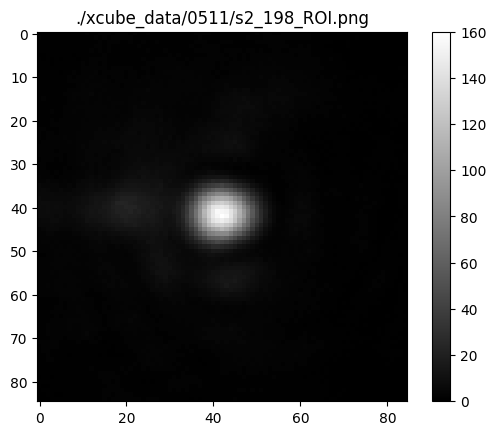

In [173]:
image = step0_load_image(psf_image_filename)
print(image.dtype)
# plot_images(image, "s2_x50_x20_256us.png")
plot_images(image, psf_image_filename)

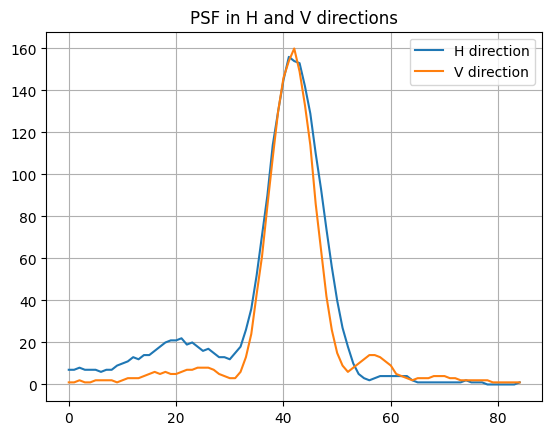

In [174]:
psf_h = step1_get_psf(image, h_line, "H")
# psf_h = step1_get_psf(image, 38, "H")

psf_v = step1_get_psf(image, v_line, "V")
# psf_v = step1_get_psf(image, 34, "V")

plt.title("PSF in H and V directions")
plt.grid()
plt.plot(psf_h, label="H direction")
plt.plot(psf_v, label="V direction")
plt.legend()

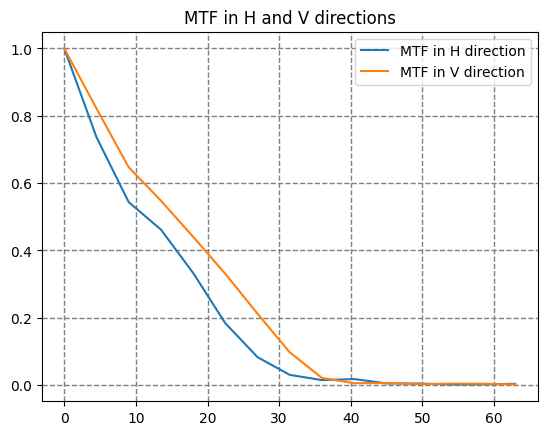

In [175]:

mtf_h, freq_h = step9_get_mtf(psf_h)
mtf_v, freq_v = step9_get_mtf(psf_v)

plt.grid(color='gray', linestyle='--', linewidth=1)

freq_numbers = 15
plt.title("MTF in H and V directions")
plt.plot(freq_h[0:freq_numbers], mtf_h[0:freq_numbers], label='MTF in H direction', linestyle='-')
plt.plot(freq_v[0:freq_numbers], mtf_v[0:freq_numbers], label='MTF in V direction', linestyle='-')

plt.legend()


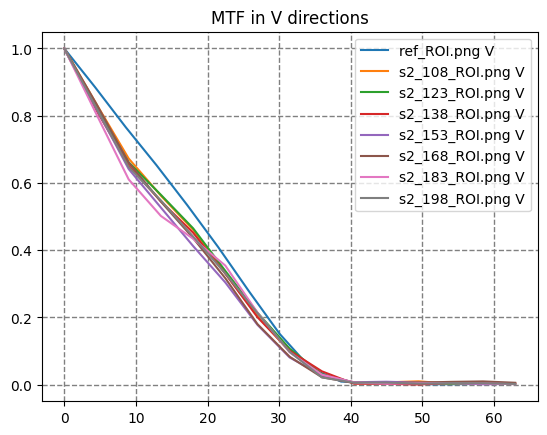

In [178]:
plt.grid(color='gray', linestyle='--', linewidth=1)
freq_numbers = 15
plt.title("MTF in V directions")


for psf in psf_files:
    psf_image_filename = psf["filename"]
    h_line = psf["h"]
    v_line = psf["v"]
    image = step0_load_image(psf_image_filename)
    psf_h = step1_get_psf(image, h_line, "H")
    psf_v = step1_get_psf(image, v_line, "V")

    mtf_h, freq_h = step9_get_mtf(psf_h)
    mtf_v, freq_v = step9_get_mtf(psf_v)
    plt.plot(freq_v[0:freq_numbers], mtf_v[0:freq_numbers], label=f'{psf_image_filename[18:]} V', linestyle='-')
    # plt.plot(freq_h[0:freq_numbers], mtf_h[0:freq_numbers], label=f'{psf_image_filename[18:]} H', linestyle='--')

plt.legend()